In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [5]:
#load model
def loadModel(model_path):
  return tf.keras.models.load_model((model_path), custom_objects={'KerasLayer':hub.KerasLayer})

In [8]:
# predict image
def predict_image(model, img_path):

  input_image = cv2.imread(img_path)

  cv2_imshow(input_image)

  input_image_resize = cv2.resize(input_image, (224,224))

  input_image_scaled = input_image_resize/255

  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  if input_pred_label == 0:
    print('The image represents a Car')

  else:
    print('The image represents a Dog')

In [7]:
# enter your model path and load model
model = loadModel('/content/model.h5')

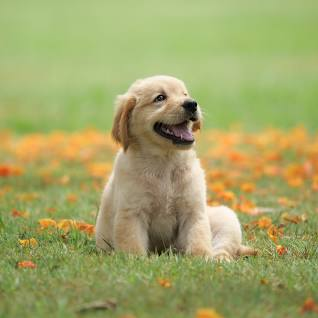

1/1 [==============================] - 1s 1s/step
[[-1.7122064  3.5060792]]
1
The image represents a Dog


In [9]:
# enter image path
predict_image(model, '/content/dog.jpg')

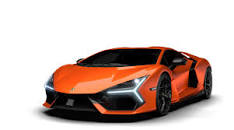

1/1 [==============================] - 0s 104ms/step
[[ 3.6110778 -3.5792036]]
0
The image represents a Car


In [10]:
predict_image(model, '/content/car.jpg')